# WeatherPy
----

In [24]:
# Dependencies
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
import time as time
output_csv_file = "output_data/list_of_cities.csv"

In [25]:

latitude_range = (-90,90)
longitude_range = (-180,180)

latitude_longitude_sample = []

latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1400)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1400)

latitude_longitude_sample = zip(latitude, longitude)

cities = []

# To utilize "citypy" for optaining a corresponding city name -
# Each randomly selected latitude and longitude cordinate in sample (latitude_longitude_sample) 
# is cross referenced to a city name and appended to the "cities" list.  

for latitude_longitude in latitude_longitude_sample:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    if city not in cities:
        cities.append(city)    


# Generate Cities List

In [26]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,arlit
1,hermanus
2,hendek
3,dongsheng
4,bathsheba


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [27]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# response = requests.get(query_url + "London").json() 

In [28]:
# to list out data elements provided in the Open Weather application API

name_list = []
id_list = []
country_list = []
lon_list = []
lat_list = []
temp_list = []
speed_list = []
humidity_list = []
clouds_list = []
dates_list = []


In [29]:
# API call for each city to obtain Name, ID, Country, Longitude, Latitude, Current Temperature, Wind Speed, Humidity,
#   and Cloudiness.   

for city in cities:
    
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    
    try: 
        city_id = weather_json['id']
        id_list.append(city_id)
        
        city_name = weather_json['name']
        name_list.append(city_name)
        
        city_country = weather_json['sys']['country']
        country_list.append(city_country)
        
        city_lon = weather_json['coord']['lon']
        lon_list.append(city_lon)
        
        city_lat = weather_json['coord']['lat']
        lat_list.append(city_lat)
        
        city_temp = weather_json['main']['temp_max']
        temp_list.append(city_temp)
        
        city_speed = weather_json['wind']['speed']
        speed_list.append(city_speed)
        
        city_humidity = weather_json['main']['humidity']
        humidity_list.append(city_humidity)
                
        city_clouds = weather_json['clouds']['all']
        clouds_list.append(city_clouds)   
        
        city_dates = weather_json['dt']
        dates_list.append(city_dates) 
            
        print(f"City Name: {city_name} - City ID: {city_id}")
           
    except:
        print("Record does not exits")
        

City Name: Arlit - City ID: 2447513
City Name: Hermanus - City ID: 3366880
City Name: Hendek - City ID: 745664
City Name: Dongsheng - City ID: 1812256
City Name: Bathsheba - City ID: 3374083
City Name: Ushuaia - City ID: 3833367
City Name: Bluff - City ID: 2206939
City Name: Cape Town - City ID: 3369157
Record does not exits
City Name: Faanui - City ID: 4034551
City Name: Saint-Philippe - City ID: 935215
Record does not exits
City Name: Butaritari - City ID: 2110227
City Name: North Platte - City ID: 5697939
City Name: Atuona - City ID: 4020109
City Name: Hobart - City ID: 2163355
City Name: Punta Arenas - City ID: 3874787
City Name: Puerto Ayora - City ID: 3652764
City Name: Tasiilaq - City ID: 3424607
City Name: Bethel - City ID: 5282297
City Name: Souillac - City ID: 933995
City Name: Gboko - City ID: 2318374
City Name: Hilo - City ID: 5855927
City Name: Hong Kong - City ID: 1819729
City Name: Shenjiamen - City ID: 1795632
City Name: Ilulissat - City ID: 3423146
City Name: Mataura -

City Name: Hobyo - City ID: 57000
City Name: Kampong Thom - City ID: 1831125
City Name: Mitsamiouli - City ID: 921786
City Name: Weligama - City ID: 1223738
City Name: Livermore - City ID: 5367440
City Name: Huilong - City ID: 1806840
City Name: Phan Thiet - City ID: 1571058
City Name: Flinders - City ID: 6255012
City Name: Bengkulu - City ID: 1649150
City Name: Sidi Ali - City ID: 2487130
Record does not exits
City Name: Tautira - City ID: 4033557
City Name: Owando - City ID: 2255542
City Name: Bawku - City ID: 2303287
City Name: Abu Kamal - City ID: 174448
City Name: Río Gallegos - City ID: 3838859
City Name: Nador - City ID: 2541479
City Name: Codrington - City ID: 2171099
City Name: Lata - City ID: 2738381
City Name: Shakawe - City ID: 933077
City Name: Luanda - City ID: 2240449
City Name: Hamilton - City ID: 4513583
City Name: Pisco - City ID: 3932145
City Name: Miguel Hidalgo - City ID: 3827408
City Name: Shīeli - City ID: 1524801
Record does not exits
City Name: Sultānpur - City

City Name: Klyuchi - City ID: 1503153
City Name: Lalibela - City ID: 332288
City Name: Sibolga - City ID: 1213855
City Name: Flin Flon - City ID: 5954718
City Name: Merrill - City ID: 5262680
City Name: Kampot - City ID: 1831112
City Name: Tiznit Province - City ID: 2527087
City Name: Nabire - City ID: 1634614
City Name: Cap-aux-Meules - City ID: 5915327
City Name: San Angelo - City ID: 5530022
City Name: Comodoro Rivadavia - City ID: 3860443
City Name: Abonnema - City ID: 2324433
City Name: Grand Gaube - City ID: 934479
City Name: Semey - City ID: 1519422
City Name: Coquimbo - City ID: 3893629
City Name: Piney Green - City ID: 4485355
City Name: Simao - City ID: 1794209
Record does not exits
City Name: Soc Trang - City ID: 1567788
City Name: Acaraú - City ID: 3408368
City Name: Ixtapa - City ID: 4004293
City Name: Warrnambool - City ID: 2144528
City Name: Saskylakh - City ID: 2017155
City Name: Les Cayes - City ID: 3728097
City Name: Saint-Joseph - City ID: 6690296
City Name: Labuhan 

In [30]:
# Summary count for each column in DataFrame 
cities_df_all = pd.DataFrame({"City Name": name_list,"City ID": id_list,"Country": country_list,"City Longitude": lon_list, "City Latitude": lat_list,
                         "City Wind Speed":speed_list, "City Wind Speed": speed_list, "City Max Temperature": temp_list, "City Humidity": humidity_list,
                         "City Cloudiness": clouds_list, "City Dates": dates_list})

print("---------------------------------------")
print(f" Data Retrieval Complete - {len(name_list)} cities")
print("---------------------------------------")

cities_df_all.count()

---------------------------------------
 Data Retrieval Complete - 564 cities
---------------------------------------


City Name               564
City ID                 564
Country                 564
City Longitude          564
City Latitude           564
City Wind Speed         564
City Max Temperature    564
City Humidity           564
City Cloudiness         564
City Dates              564
dtype: int64

In [31]:
# Check the above totals to ensure the final number of cities is greater than 500.  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
output_csv_file = "output_data/list_of_cities.csv"
cities_df_all.to_csv("output_data/city_data_all.csv", index = False)

In [108]:
# To open csv file "cities_df_all" and display the file in a DataFrame fomat (to avoid rerunning API calls).     
# To export all city information into a CSV file, without an index
# Dependencies

file_to_load = "output_data/city_data_all.csv"
city_data_df = pd.read_csv(file_to_load)
city_data_df_all = pd.DataFrame(city_data_df)
city_data_df_all.head()


,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
0,Arlit,2447513,NE,7.3853,18.7369,12.26,89.26,4,0,1621982659
1,Hermanus,3366880,ZA,19.2345,-34.4187,7.31,57.90,74,51,1621982581
2,Hendek,745664,TR,30.7481,40.7994,1.95,50.32,81,3,1621982659
3,Dongsheng,1812256,CN,109.9776,39.8161,15.08,54.79,48,39,1621982659
4,Bathsheba,3374083,BB,-59.5167,13.2167,12.57,81.21,61,20,1621982595


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.  

As outlined below, there are no cities in the above sample data with humidity reported as greater than 100%

In [109]:
# Check to ensure city humidity is not reported as greater than 100% for any one particular city.  
cities_df_all.describe()

,City ID,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
count,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,2.704796e+06,17.984681,18.807928,8.134592,65.698440,69.069149,55.719858,1.621983e+09
std,1.695847e+06,90.121059,32.290548,5.782302,16.243331,21.467490,38.234523,7.665005e+01
min,5.315700e+04,-175.200000,-54.800000,0.000000,20.230000,4.000000,0.000000,1.621982e+09
25%,1.525691e+06,-61.440150,-5.205900,4.000000,52.105000,57.000000,19.750000,1.621983e+09
50%,2.207594e+06,23.126500,20.323650,6.780000,68.810000,74.000000,67.000000,1.621983e+09
75%,3.663508e+06,100.509425,44.920825,11.010000,78.827500,85.250000,94.000000,1.621983e+09
max,8.079926e+06,179.316700,78.218600,44.130000,99.090000,100.000000,100.000000,1.621983e+09


In [110]:
# Additional check to ensure city humidity is not reported as greater than 100% for any one particular city.  

cities_humidity_greater_100per = cities_df_all.loc[cities_df_all["City Humidity"] > 100]
cities_humidity_greater_100per

,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [111]:
# Calculation and for format Date for charts - to convert time expressed in seconds 
date_for_charts = time.gmtime(city_data_df_all["City Dates"][0])
# To convert a tuple or struct_time representing a time as returned by gmtime # time.strftime(format[, t])
date_for_charts_final = time.strftime("%x", date_for_charts)

## Latitude vs. Temperature Plot

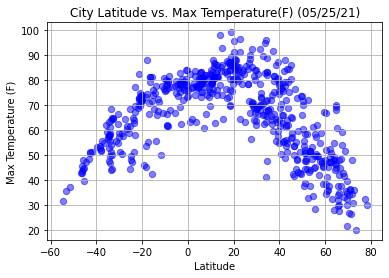

In [112]:
date = date_for_charts_final
x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Max Temperature"]
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature(F) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the max temperature for various cities relative to geographic latitude. As a cities geographic location is closer to the equator (i.e., latitude -20 to 20), climates become much warmer. Conversely, as a cities geographic location are farther away from the equator, city climates become much cooler. The sample size is ~500 plus cities.

## Latitude vs. Humidity Plot

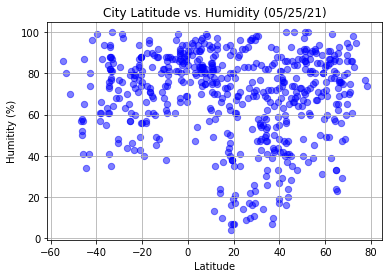

In [127]:
date = date_for_charts_final
x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the humidity percentage for various cities relative to geographic latitude. The sample size is ~500 plus cities. Based on the plot chart shown above - there does not appear to be any significant correlation between humidity percentage and geographic latitude.

## Latitude vs. Cloudiness Plot

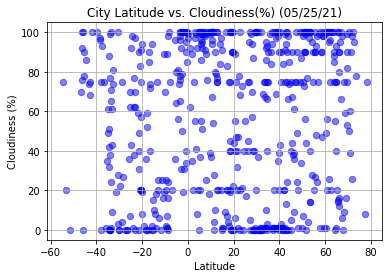

In [128]:
date = date_for_charts_final
x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the cloudiness (%) for various cities in relation to geographic latitude.  The sample size is ~500 plus cities.  Based on the plot chart shown above - there does not appear to be any significant correlation between cloudiness percentage and geographic latitude.

## Latitude vs. Wind Speed Plot

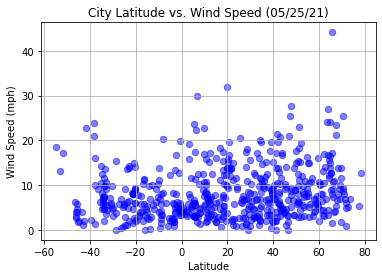

In [140]:
date = date_for_charts_final
x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing wind speed for various cities relative to geographic latitude. The sample size contains ~500 plus cities.  Note: There is one outlier for a windspeed of 47 mph for Tasiilaq, Greenland - wind speeds have been up to 60 mph as of 05/25/2021.  Overall, there does not appear to be any significant correlation between wind speed mph and geographic latitude.

In [141]:
# To establish new preliminary DataFrames for plotting data in the Northern and Southern Hemispheres

# Northern Hemisphere
northern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] >= 0]
northern_df.reset_index(inplace=True)
x_axis_north_df_latitude = northern_df["City Latitude"]
y_axis_north_temp_df = northern_df["City Max Temperature"]
y_axis_north_humidity_df = northern_df["City Humidity"]
y_axis_north_cloudiness_df = northern_df["City Cloudiness"]
y_axis_north_windspeed_df = northern_df["City Wind Speed"]

# Southeren Hemisphere
southern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] < 0]
southern_df.reset_index(inplace=True)
x_axis_south_df_latitude = southern_df["City Latitude"]
y_axis_south_temp_df = southern_df["City Max Temperature"]
y_axis_south_humidity_df = southern_df["City Humidity"]
y_axis_south_cloudiness_df = southern_df["City Cloudiness"]
y_axis_south_windspeed_df = southern_df["City Wind Speed"]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7847971651469107


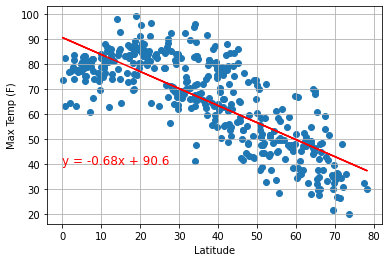

In [142]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_temp_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7998052214398775


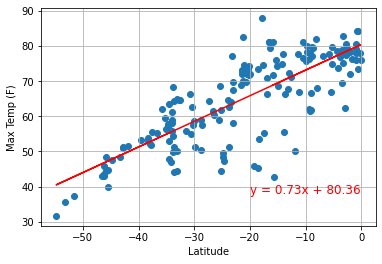

In [143]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_temp_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,38),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

The above plot charts are showing the max temperature for various cities relative to geographic latitude. As a cities geographic location is closer to the equator (latitudes -20 to 20), climates become much warmer (70-100) max temperature.  The high r-values indicate a strong positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0124629645637915


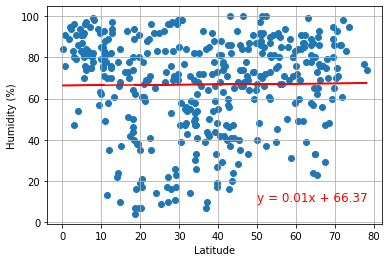

In [144]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_humidity_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2648329180772039


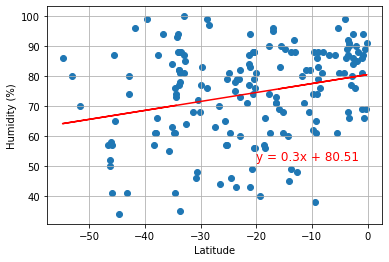

In [145]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_humidity_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,52),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

The above plot charts are showing the humidity % for various cities relative to geographic latitude. The low r-values indicate a very weak positive correlation between latitude and humidity %.   

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004614951342796806


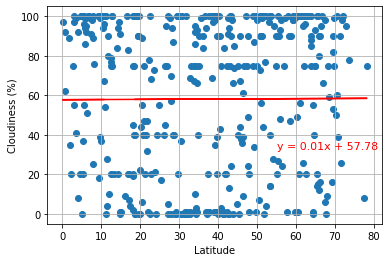

In [149]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(55,33),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05202486495165239


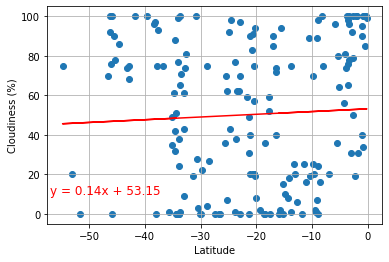

In [150]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-57,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

The above plot charts are showing the cloudiness % for various cities relative to geographic latitude. The low r-values indicate a very weak positive correlation between latitude and cloudiness %.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13427975465986897


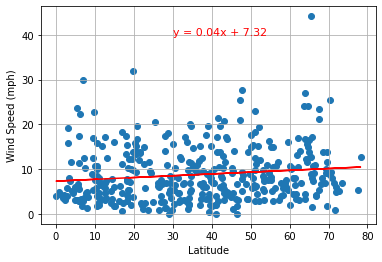

In [138]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_windspeed_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30,40),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16422966810943349


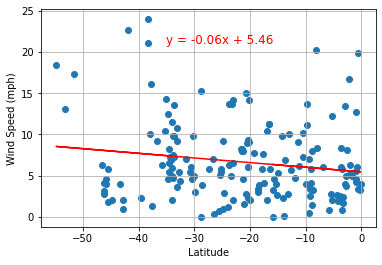

In [139]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_windspeed_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-35,21),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

The above plot charts are showing the wind speed mph for various cities relative to geographic latitude. The low r-values indicate a very weak positive correlation between latitude and wind speed mph.